<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.152322,33.816263,-0.001988,140.966597,140.970894,-0.004297
1,0.0,1.0,85.356598,82.032942,0.005413,177.394953,177.389949,0.005004
2,0.0,2.0,70.203421,58.550359,0.005274,138.759054,138.754816,0.004238
3,0.0,3.0,63.303322,30.376893,0.012206,103.692421,103.682165,0.010256
4,0.0,4.0,70.510383,76.578640,-0.005036,157.083986,157.089416,-0.005429
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.696413,57.255132,-0.005810,113.945735,113.952251,-0.006516
249996,999.0,246.0,49.465169,74.705299,0.001864,134.172332,134.171029,0.001303
249997,999.0,247.0,62.305271,60.470659,0.011062,132.786992,132.776124,0.010868
249998,999.0,248.0,52.053273,79.403684,0.003286,141.460242,141.457418,0.002823


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.152322,33.816263,-0.001988,140.966597,140.970894,-0.004297
1,0.0,1.0,85.356598,82.032942,0.005413,177.394953,177.389949,0.005004
2,0.0,2.0,70.203421,58.550359,0.005274,138.759054,138.754816,0.004238
3,0.0,3.0,63.303322,30.376893,0.012206,103.692421,103.682165,0.010256
4,0.0,4.0,70.510383,76.578640,-0.005036,157.083986,157.089416,-0.005429
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.696413,57.255132,-0.005810,113.945735,113.952251,-0.006516
249996,999.0,246.0,49.465169,74.705299,0.001864,134.172332,134.171029,0.001303
249997,999.0,247.0,62.305271,60.470659,0.011062,132.786992,132.776124,0.010868
249998,999.0,248.0,52.053273,79.403684,0.003286,141.460242,141.457418,0.002823


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.152322,33.816263,-0.001988,140.966597,140.970894,-0.004297
1,0.0,1.0,85.356598,82.032942,0.005413,177.394953,177.389949,0.005004
2,0.0,2.0,70.203421,58.550359,0.005274,138.759054,138.754816,0.004238
3,0.0,3.0,63.303322,30.376893,0.012206,103.692421,103.682165,0.010256
4,0.0,4.0,70.510383,76.578640,-0.005036,157.083986,157.089416,-0.005429
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.696413,57.255132,-0.005810,113.945735,113.952251,-0.006516
249996,999.0,246.0,49.465169,74.705299,0.001864,134.172332,134.171029,0.001303
249997,999.0,247.0,62.305271,60.470659,0.011062,132.786992,132.776124,0.010868
249998,999.0,248.0,52.053273,79.403684,0.003286,141.460242,141.457418,0.002823


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

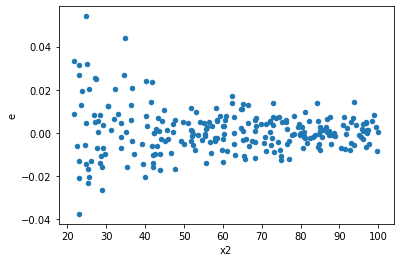

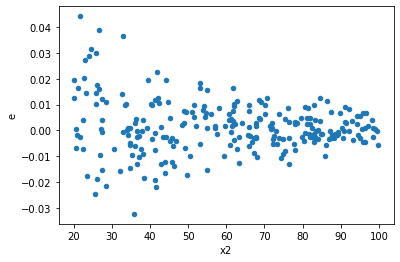

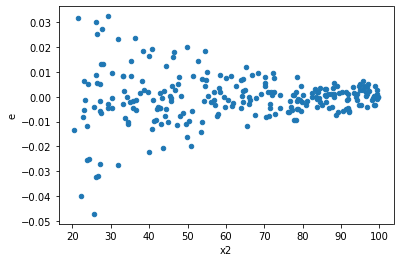

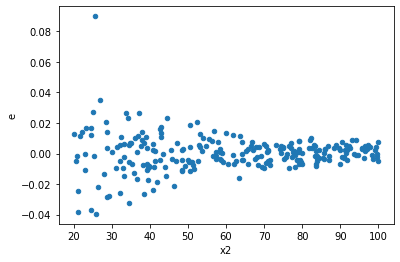

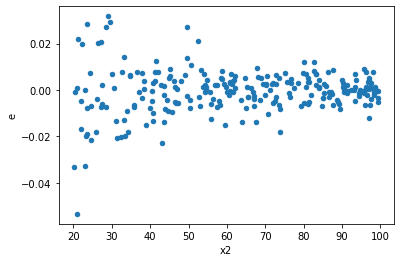

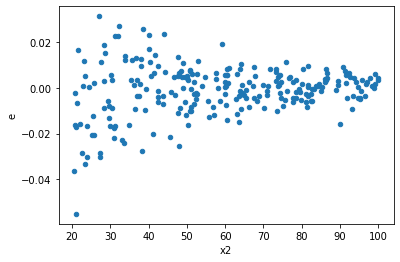

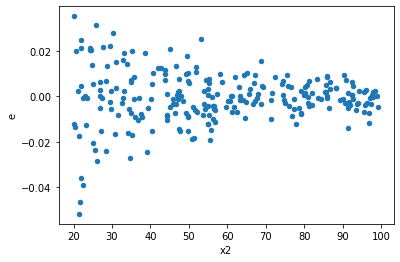

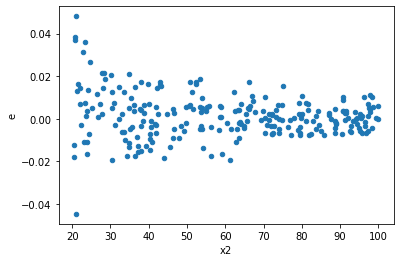

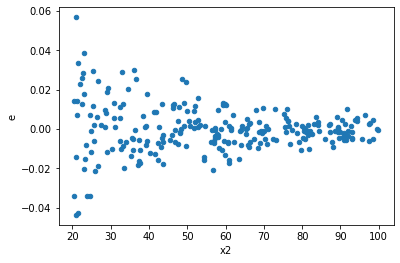

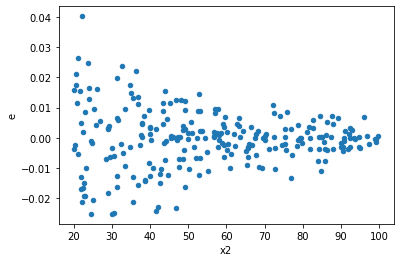

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.01657313437871566,0.003628680824102685,0.00016911361610934345,3.702735534798658e-05,0.21894958076022616,6.977413912711495e-13,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.013937364370951543,0.003518333138373217,0.00014221800378521983,3.5901358554828746e-05,0.2524389149003077,5.600901554177743e-11,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.01954467112237722,0.0030065998185314037,0.00019943541961609407,3.067958998501432e-05,0.1538322031466197,4.0975412000863156e-18,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.02644694452325339,0.003360485540596553,0.00026986678084952437,3.429066878159748e-05,0.12706517146590818,3.315659170072407e-21,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.015211361339899993,0.0029951626101622545,0.00015521797285612238,3.056288377716586e-05,0.19690299528325753,2.2023289756420125e-14,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.019016843382942936,0.004210592986161743,0.00019404942227492793,4.296523455267085e-05,0.22141387513021293,9.955417792475804e-13,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.020532139607647267,0.004743543092652374,0.00020951162864946192,4.8403500945432384e-05,0.2310301402239455,3.779241395023457e-12,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.017935054551441208,0.0047317633605650925,0.00018301076072899192,4.8283299597602984e-05,0.26382765365967964,2.0514703155704957e-10,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.021960283401540274,0.004656766532117944,0.000224084524505513,4.75180258379382e-05,0.21205402712568466,2.501283284500298e-13,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64